In [8]:
import pandas as pd
import numpy as np

#amount of samples
num_samples = 1000

# Generating the required data
advertising_spend = np.random.randint(100, 1000, size=num_samples)
promotion_budget = np.random.randint(10, 100, size=num_samples)
seasonal_index = np.random.choice([1, 2, 3], size=num_samples)
product_price = np.random.randint(50, 500, size=num_samples)  
geographical_data = np.random.randint(1, 4, size=num_samples)  


sales = 100 + 0.5 * advertising_spend + 2 * promotion_budget + 50 * seasonal_index + np.random.normal(0, 50, size=num_samples)

data = pd.DataFrame({
    'Advertising Spend': advertising_spend,
    'Promotion Budget': promotion_budget,
    'Seasonal Index': seasonal_index,
    'Product Price': product_price,
    'Geographical Data': geographical_data,
    'Sales': sales
})

# Save to CSV
data.to_csv('sales_data.csv', index=False)

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from tkinter import Tk, Label, Entry, Button, StringVar, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.read_csv('sales_data.csv')



C:\Users\suraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

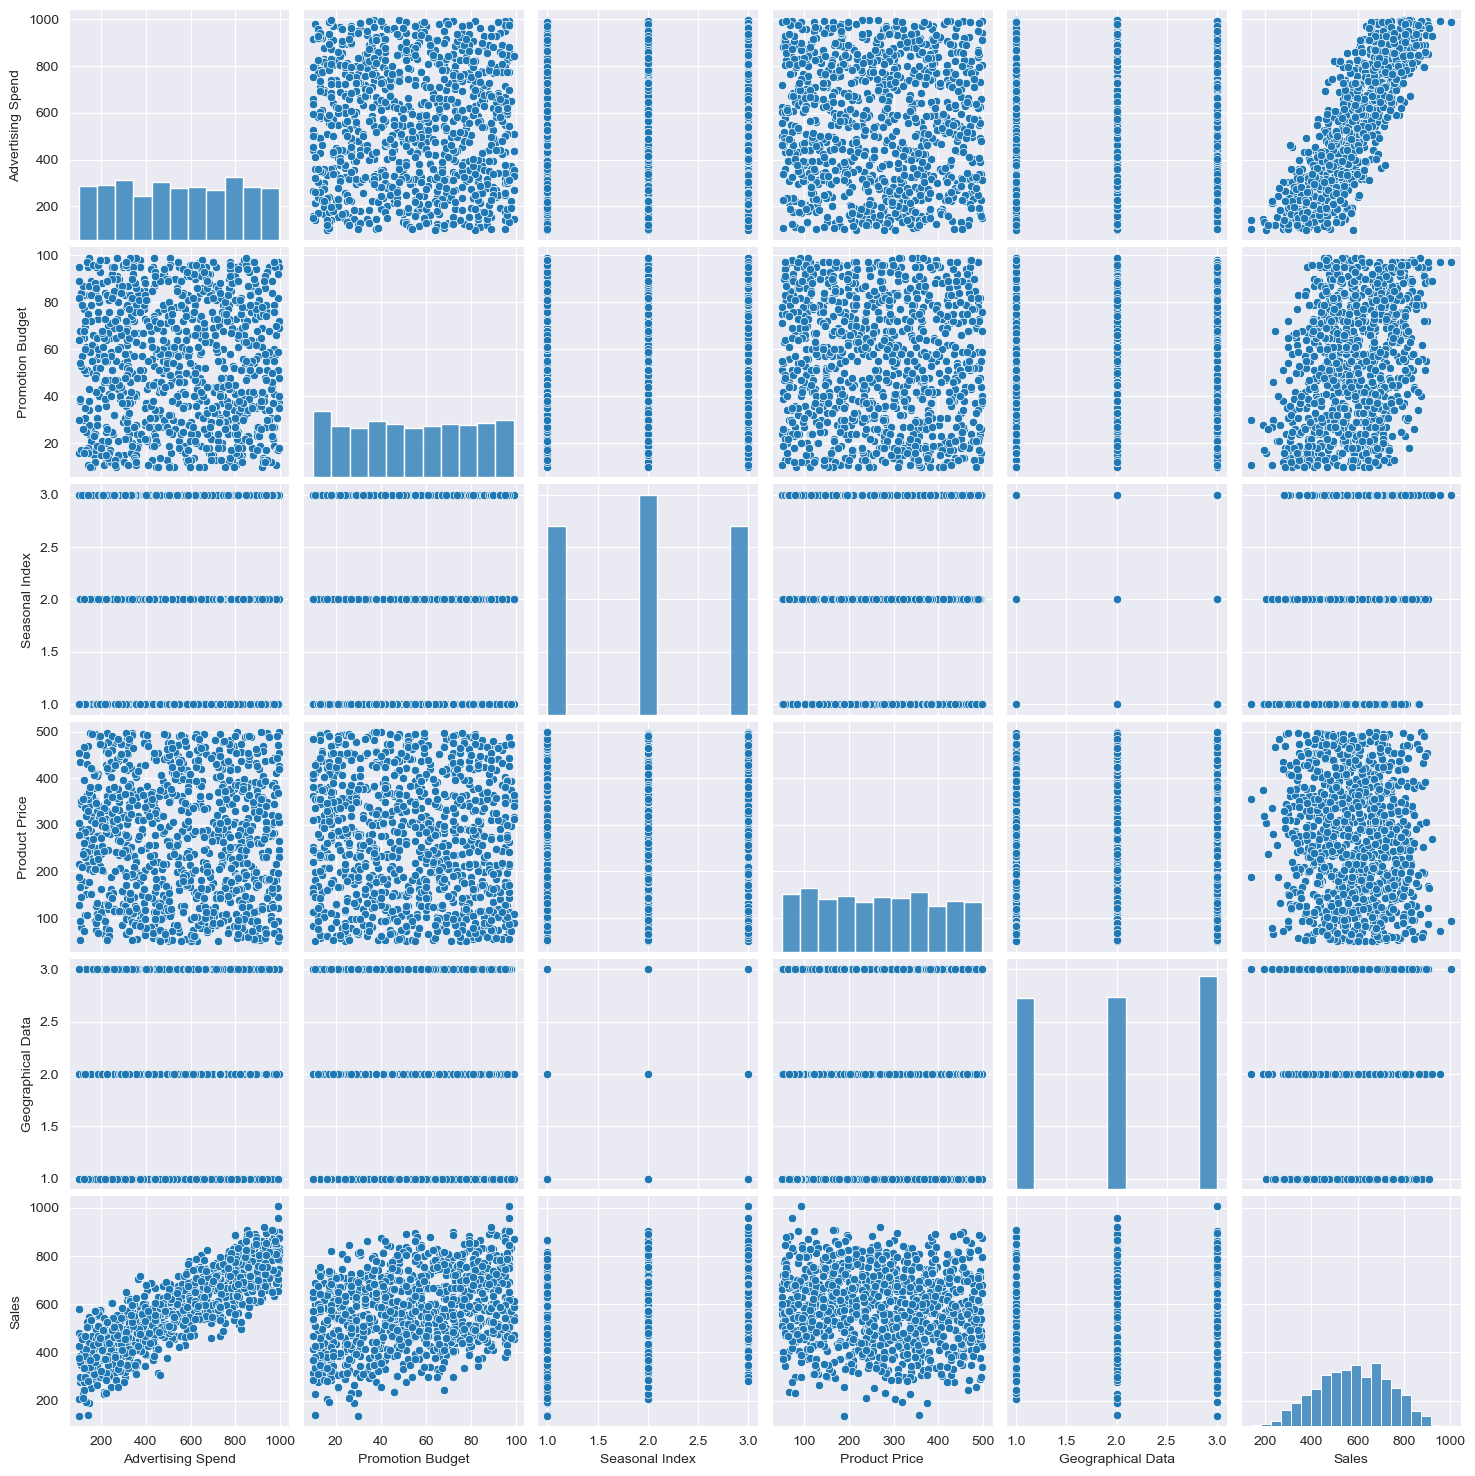

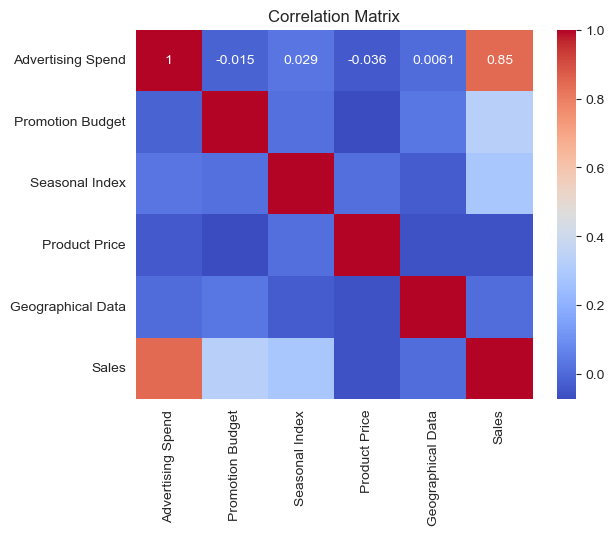

In [ ]:


X = data.drop('Sales', axis=1)
y = data['Sales']

X = df[['Advertising Spend', 'Promotion Budget', 'Seasonal Index', 'Product Price', 'Geographical Data']]  # Include additional features
y = df['Sales']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting proceess
#linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#polynomial regression model
poly_features = PolynomialFeatures(degree=2)  
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

#lasso regression model
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)

#ridge regression model
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

def explore_data(data):
    #relationship between features
    sns.pairplot(data)
    plt.show()
    
    # Correlation matrix
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

explore_data(data)

#plot graphs and show important features
def plot_graphs():
    plt.figure(figsize=(16, 8))

    # Plot linear regression 
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, linear_model.predict(X_test), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    
    # Plot polynomial regression
    plt.subplot(2, 2, 2)
    plt.scatter(y_test, poly_model.predict(X_poly_test), color='green')
    plt.title('Polynomial Regression')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    # Plot Lasso regression 
    plt.subplot(2, 2, 3)
    plt.scatter(y_test, lasso_model.predict(X_test), color='orange')
    plt.title('Lasso Regression')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    
    # Plot Ridge regression 
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, ridge_model.predict(X_test), color='purple')
    plt.title('Ridge Regression')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    plt.tight_layout()

    #tkinter implementation
    canvas = FigureCanvasTkAgg(plt.gcf(), master=root)
    canvas.draw()
    canvas.get_tk_widget().grid(row=8, column=0, columnspan=2)


#print important features
def print_important_features():
    lasso_important_feature = X.columns[np.argmax(np.abs(lasso_model.coef_))]
    ridge_important_feature = X.columns[np.argmax(np.abs(ridge_model.coef_))]
    print(f"Lasso Regression Important Feature: {lasso_important_feature}")
    print(f"Ridge Regression Important Feature: {ridge_important_feature}")
    
def print_mse():
    linear_mse = mean_squared_error(y_test, linear_model.predict(X_test))
    poly_mse = mean_squared_error(y_test, poly_model.predict(X_poly_test))
    lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
    ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))

    print(f'Linear Regression MSE: {linear_mse:.2f}')
    print(f'Polynomial Regression MSE: {poly_mse:.2f}')
    print(f'Lasso Regression MSE: {lasso_mse:.2f}')
    print(f'Ridge Regression MSE: {ridge_mse:.2f}')

def predict_sales():
    try:
        ad_spend = float(ad_spend_var.get())
        promo_budget = float(promo_budget_var.get())
        seasonal_index = float(seasonal_index_var.get())
        product_price = float(product_price_var.get())  # Additional feature
        geographical_data = float(geographical_data_var.get())  # Additional feature
        
        features = np.array([[ad_spend, promo_budget, seasonal_index, product_price, geographical_data]])  # Include additional features
        
        # Predict sales linear regression model
        linear_prediction = linear_model.predict(features)[0]
        result_var['Linear Regression'].set(f'Linear Regression Predicted Sales: {linear_prediction:.2f}')
        
        # Predict sales polynomial regression model
        features_poly = poly_features.transform(features)
        poly_prediction = poly_model.predict(features_poly)[0]
        result_var['Polynomial Regression'].set(f'Polynomial Regression Predicted Sales: {poly_prediction:.2f}')
        
        # Predict sales Lasso regression model
        lasso_prediction = lasso_model.predict(features)[0]
        result_var['Lasso Regression'].set(f'Lasso Regression Predicted Sales: {lasso_prediction:.2f}')
        
        # Predict sales Ridge regression model
        ridge_prediction = ridge_model.predict(features)[0]
        result_var['Ridge Regression'].set(f'Ridge Regression Predicted Sales: {ridge_prediction:.2f}')
        
     
        print_important_features()
        print_mse()
        plot_graphs()

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers.")



#Create gui
root = Tk()
root.title("Sales Prediction")

#elements
Label(root, text="Advertising Spend").grid(row=0, column=0)
Label(root, text="Promotion Budget").grid(row=1, column=0)
Label(root, text="Seasonal Index").grid(row=2, column=0)
Label(root, text="Product Price").grid(row=3, column=0)
Label(root, text="Geographical Data").grid(row=4, column=0)

ad_spend_var = StringVar()
promo_budget_var = StringVar()
seasonal_index_var = StringVar()
product_price_var = StringVar()
geographical_data_var = StringVar()

Entry(root, textvariable=ad_spend_var).grid(row=0, column=1)
Entry(root, textvariable=promo_budget_var).grid(row=1, column=1)
Entry(root, textvariable=seasonal_index_var).grid(row=2, column=1)
Entry(root, textvariable=product_price_var).grid(row=3, column=1)
Entry(root, textvariable=geographical_data_var).grid(row=4, column=1)

Button(root, text="Predict", command=predict_sales).grid(row=5, column=0, columnspan=2)

result_var = {}
result_var['Linear Regression'] = StringVar()
Label(root, textvariable=result_var['Linear Regression']).grid(row=6, column=0, columnspan=2)
result_var['Polynomial Regression'] = StringVar()
Label(root, textvariable=result_var['Polynomial Regression']).grid(row=7, column=0, columnspan=2)
result_var['Lasso Regression'] = StringVar()
Label(root, textvariable=result_var['Lasso Regression']).grid(row=8, column=0, columnspan=2)
result_var['Ridge Regression'] = StringVar()
Label(root, textvariable=result_var['Ridge Regression']).grid(row=9, column=0, columnspan=2)

#labels
result_var['Lasso Regression Important Feature'] = StringVar()
Label(root, textvariable=result_var['Lasso Regression Important Feature']).grid(row=10, column=0, columnspan=2)
result_var['Ridge Regression Important Feature'] = StringVar()
Label(root, textvariable=result_var['Ridge Regression Important Feature']).grid(row=11, column=0, columnspan=2)

#GUI loop
root.mainloop()